In [1]:
# Step 1: Import necessary libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the dataset
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
# Step 2: Explore the dataset to understand its structure and content
print(df.head())  # Display the first few rows
print(df.info())  # Display dataset information, including data types
print(df.describe())  # Summary statistics for numerical columns

   Transaction ID        Date Customer ID  Gender  Age Product Category   
0               1  2023-11-24     CUST001    Male   34           Beauty  \
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [8]:
# Step 3: Identify relevant variables for aggregating sales data
# The relevant columns are "Total Amount" and "Product Category".

In [9]:
# Step 4: Group the sales data by product category and calculate the total sales amount for each category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()
print(sales_by_category)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


C:\Users\DELL\AppData\Local\Temp\ipykernel_21304\2056613481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette="viridis")


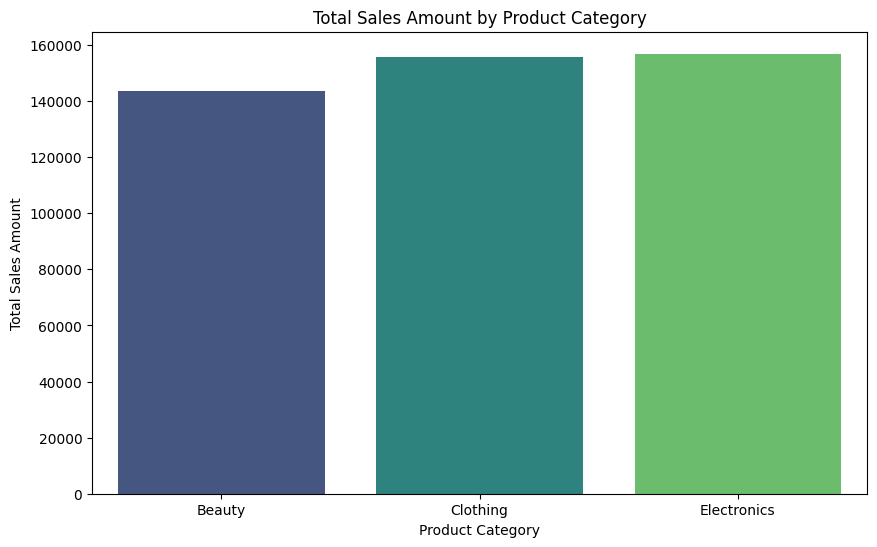

In [10]:
# Step 5: Create bar plots or pie charts to visualize the sales distribution by product category

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=sales_by_category, palette="viridis")
plt.title("Total Sales Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()

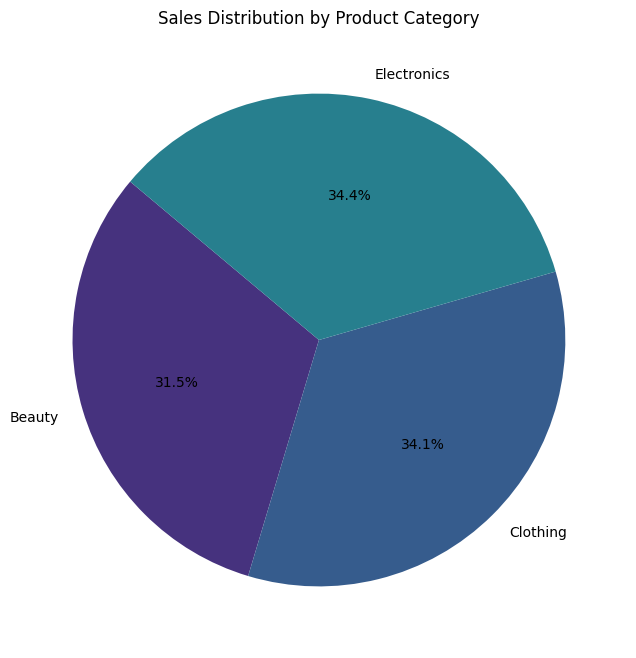

In [11]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['Total Amount'], labels=sales_by_category['Product Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Sales Distribution by Product Category")
plt.show()

In [12]:
# Step 6: Identify the top-performing product categories based on the highest sales amount
top_categories = sales_by_category.sort_values(by='Total Amount', ascending=False).head()
print("Top Performing Product Categories:")
print(top_categories)

Top Performing Product Categories:
  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


In [13]:
# Step 7: Group the sales data by product category and transaction date to calculate the total sales amount for each combination
# This helps analyze how product sales trend over time
sales_by_category_date = df.groupby(['Product Category', 'Date'])['Total Amount'].sum().unstack()
print(sales_by_category_date)

Date              2023-01-01  2023-01-02  2023-01-03  2023-01-04  2023-01-05   
Product Category                                                               
Beauty                1500.0        25.0       600.0      1090.0        50.0  \
Clothing              2100.0      1650.0         NaN       150.0         NaN   
Electronics              NaN        90.0         NaN         NaN      1050.0   

Date              2023-01-06  2023-01-07  2023-01-08  2023-01-09  2023-01-10   
Product Category                                                               
Beauty                   NaN         NaN         NaN         NaN         NaN  \
Clothing               500.0        75.0       600.0       200.0        30.0   
Electronics            120.0        75.0        25.0         NaN       200.0   

Date              ...  2023-12-22  2023-12-23  2023-12-24  2023-12-25   
Product Category  ...                                                   
Beauty            ...      1000.0       525.0       

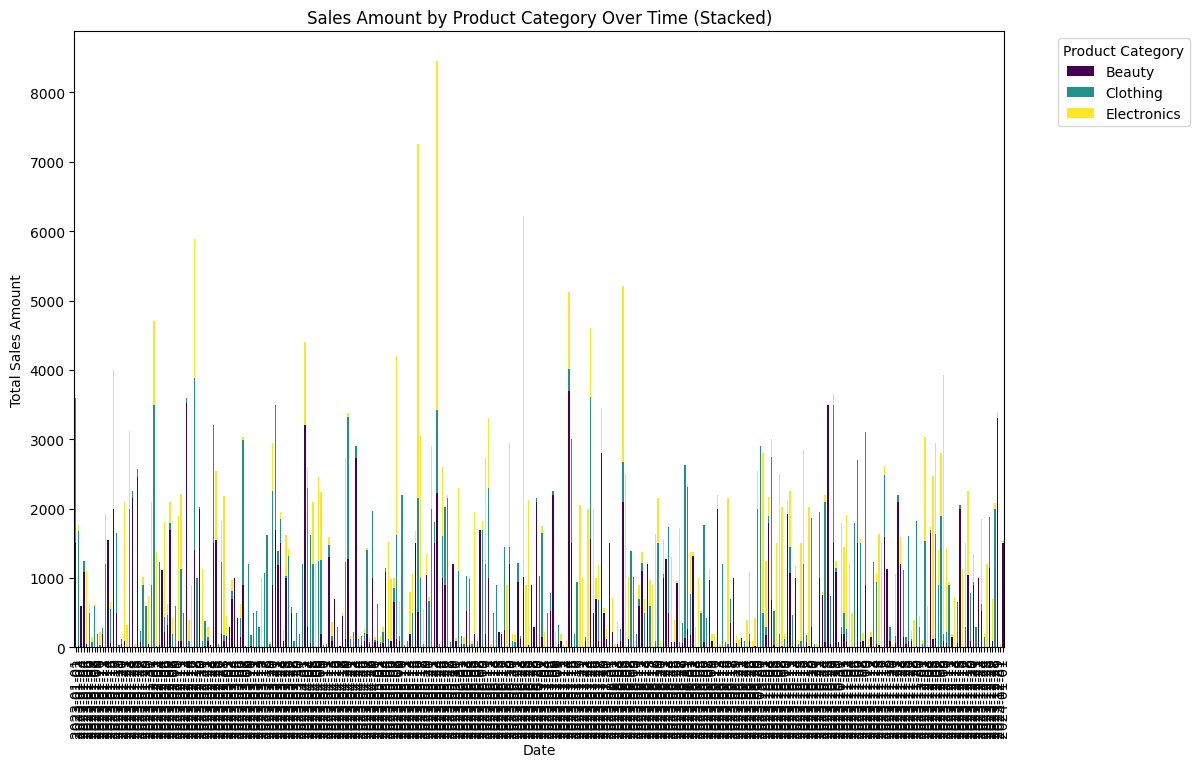

In [14]:
# Step 8: Create stacked or grouped bar plots to compare sales amounts across different product categories over time

# Stacked Bar Plot
sales_by_category_date.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Sales Amount by Product Category Over Time (Stacked)")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

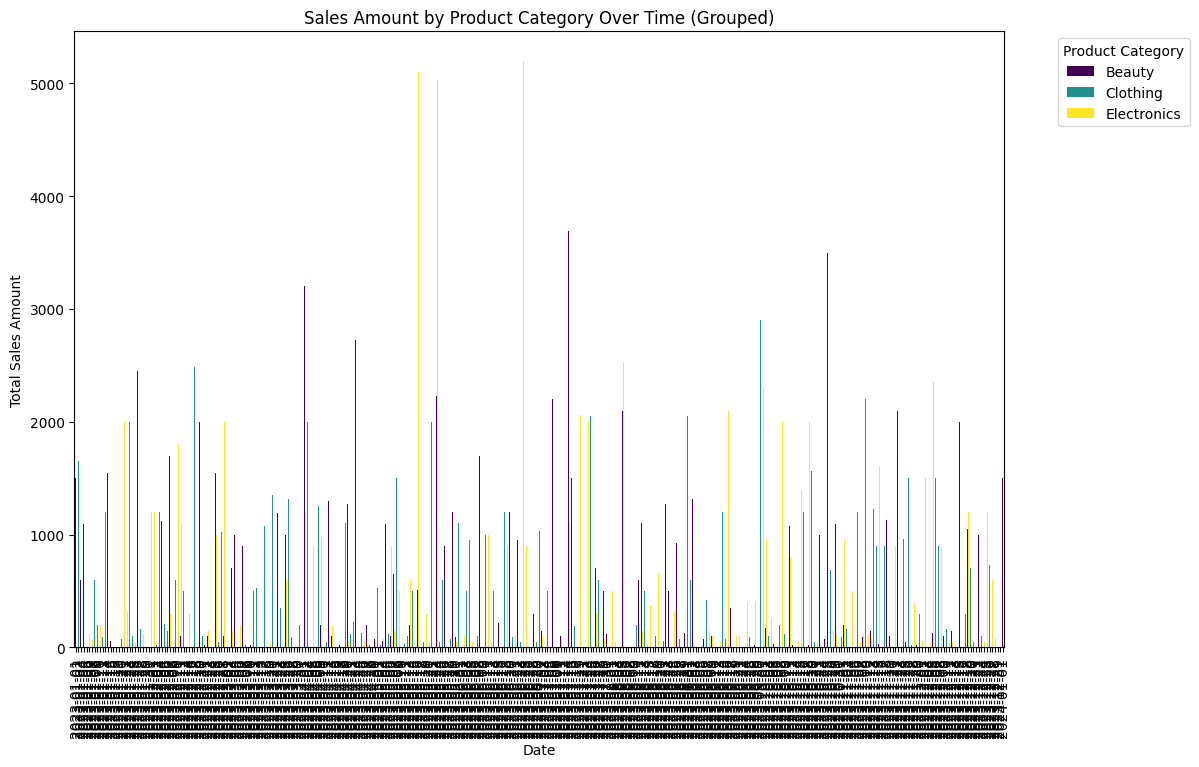

In [15]:
# Grouped Bar Plot
sales_by_category_date.T.plot(kind='bar', figsize=(12, 8), colormap="viridis")
plt.title("Sales Amount by Product Category Over Time (Grouped)")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()